
#Classificação de Espécies de Água-Viva Usando TensorFlow

Tartarugas marinhas são de grande importância no controle populacional de alguns animais marinhos, sendo o maior predador natural da água viva. Ainda assim, tartarugas marinhas se encontram ameaçadas de extinção, o que acaba causando um desquelibrio populacional de águas vivas. Dessa forma, geramos um modelo que identifica a espécie específica da água viva na imagem ou se é lixo plástico, proporcionando uma ferramenta poderosa para pesquisa e conservação. É necessário inserir a imagem e alterar o caminho da mesma para poder testar o modelo.



---

Turma 2TDSPS
Projeto - Turtle Track

Grupo -

* 96409 - Leonardo Guimarães de Lima Marques
* 97385 - José Carlos da Silva
* 97569 - Maria Luiza de Goveia Lima
* 96906 - Mariana Marques Sabio
* 96881 - Vinícius de Abreu Pena

---



In [18]:
!pip install tensorflow pillow

In [19]:
import numpy as np
from keras.models import load_model
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

1/1 [==============================] - 2s 2s/step


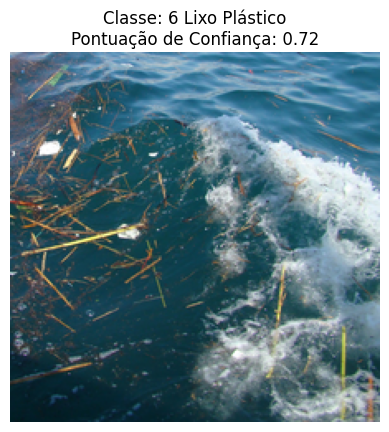

In [20]:
#Desabilitando a notação científica para maior clareza
np.set_printoptions(suppress=True)

#Carregando o modelo
model = load_model("keras_model.h5", compile=False)

#Carregando os rótulos
class_names = open("labels.txt", "r").readlines()

#Criando um array com a forma correta para alimentar o modelo Keras
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

#Caminho da imagem
image_path = "/content/windrow.jpg"  # Substitua pelo caminho da imagem carregada
image = Image.open(image_path).convert("RGB")

#Redimensionando a imagem
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

#Conversão da imagem em um array numpy e normaliza
image_array = np.asarray(image)
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

data[0] = normalized_image_array

#Previsão
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index].strip()
confidence_score = prediction[0][index]

#Exibindo a imagem com a previsão e a pontuação de confiança
plt.imshow(image)
plt.title(f"Classe: {class_name}\nPontuação de Confiança: {confidence_score:.2f}")
plt.axis('off')
plt.show()